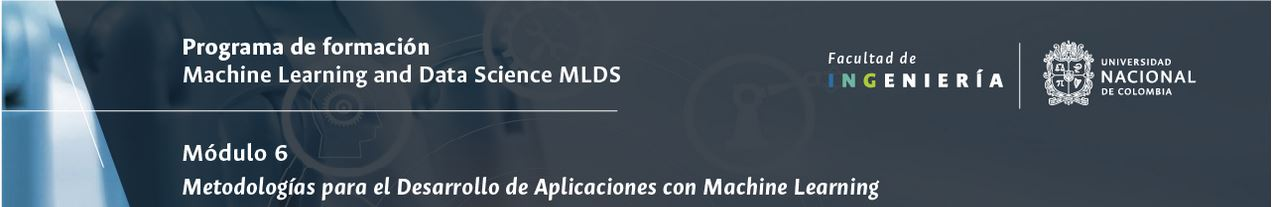

# **Proyecto Aplicado, Módulo 6 del programa de formación de Machine Learning and Data Sciencie MLDS**
---

**Estudiante: Daniel Trillos Navarro**

Instalación de paquetes

In [27]:
#Entrenamiento y Validación
early_stopp = EarlyStopping(patience = 20, min_delta = 0.001,
                                               restore_best_weights =True )

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

escalado = StandardScaler()

x_train_escalado = escalado.fit_transform(x_train)
x_test_escalado = escalado.transform(x_test)

In [29]:
historico = Modelo_clasf.fit(x_train_escalado,
            y_train,
            epochs=500,
            validation_split=0.25,
            callbacks=[early_stopp],
            verbose=1)

Epoch 1/500
500/500 [==============================] - 7s 10ms/step - loss: 0.1592 - accuracy: 0.9450 - val_loss: 0.0939 - val_accuracy: 0.9621
Epoch 2/500
500/500 [==============================] - 4s 8ms/step - loss: 0.0819 - accuracy: 0.9677 - val_loss: 0.0613 - val_accuracy: 0.9747
Epoch 3/500
500/500 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9815 - val_loss: 0.0447 - val_accuracy: 0.9865
Epoch 4/500
500/500 [==============================] - 10s 20ms/step - loss: 0.0403 - accuracy: 0.9855 - val_loss: 0.0322 - val_accuracy: 0.9921
Epoch 5/500
500/500 [==============================] - 4s 7ms/step - loss: 0.0304 - accuracy: 0.9890 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 6/500
500/500 [==============================] - 3s 7ms/step - loss: 0.0248 - accuracy: 0.9906 - val_loss: 0.0178 - val_accuracy: 0.9951
Epoch 7/500
500/500 [==============================] - 5s 9ms/step - loss: 0.0206 - accuracy: 0.9927 - val_loss: 0.0200 - val_accuracy: 0.

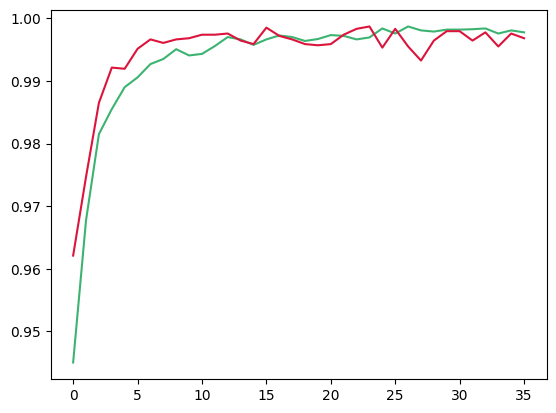

In [30]:
#Evaluación o Aplicación del modelo
plt.plot(historico.history['accuracy'],color = "mediumseagreen")
plt.plot(historico.history['val_accuracy'],color = "crimson")
plt.show()

In [31]:
y_pred = Modelo_clasf.predict(x_test_escalado)

223/223 [==============================] - 1s 3ms/step


In [32]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [33]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoria = ['No Fraude','Fraude']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Estimado')
    ticks = np.arange(len(categoria))
    plt.xticks(ticks, categoria, rotation=45)
    plt.yticks(ticks, categoria)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [34]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

In [35]:
columnas = ['Modelo','accuracy score', ' Precision','Recall','f1_score']
evaluacion_df = pd.DataFrame(columns=columnas)
evaluacion_df

,Modelo,accuracy score,Precision,Recall,f1_score


In [36]:
import sklearn.metrics as metrics
def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')

    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)

    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}')

    f1_score = metrics.f1_score(y_test,y_pred)

    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)

#   save scores into dataframe for comparison
    evaluacion_df.loc[len(evaluacion_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]

    Plot_confusion_matrix(y_test,y_pred,model_name)

    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

ANN 
--------------------------------------------------------------------------
accuracy score :0.9967642093415869
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



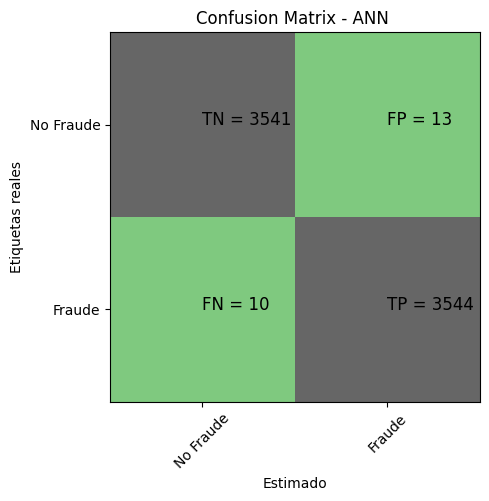

In [37]:
print_results("ANN ", y_test, y_pred)

In [38]:
evaluacion_df

,Modelo,accuracy score,Precision,Recall,f1_score
0,ANN,0.996764,0.996345,0.997186,0.996766
